THE SCENARIO


Researchers at GSK have been working on an innovative family of drugs to help people with solid tumours that continue to grow despite other treatments. A promising candidate, Miraculon-B (a fake name, obviously!), has been making its way through our development pipeline.

A late phase clinical trial for Miraculon-B has recently finished. This trial was focused on understanding if Miraculon-B was more effective than the standard of care in shrinking solid tumours in patients that don’t respond to other treatments. To determine this, the clinical trial data needed to be analysed to understand whether patients saw enough of a benefit from the treatment. Work is underway to present a package to the regulatory agencies that describes who is most likely to benefit from this new medicine and to seek agreement on our proposed strategy for aiding prescribers considering the value of Miraculon-B for their patients.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [3]:
study_df = pd.read_excel('data/clinical-study.xlsx',sheet_name='in')
study_df.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [4]:
protein_df = pd.read_excel('data/protein-levels.xlsx',sheet_name='in')
protein_df.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


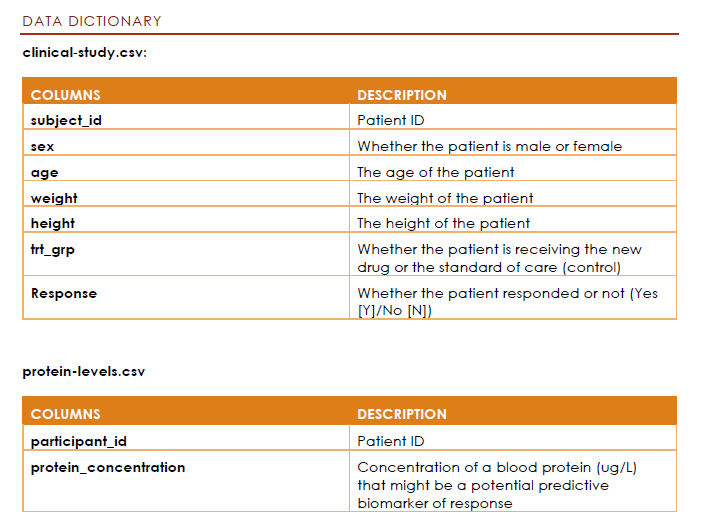

# Data Cleaning

Here participant_id & subject_id represent the entity so change it to a common name

In [5]:
study_df.rename(columns={'subject_id':'participant_id'},inplace=True)
study_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


### Merge the two datasets using the subject_id column.

In [6]:

# Merge the two datasets on the subject_id column
merged_df = pd.merge(study_df, protein_df, on='participant_id')
merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0


## Check for missing values and outliers.

In [7]:
# create a dataframe of percentage of null values
null_dict = (dict(merged_df.isna().mean().round(4)*100))
null_df = pd.DataFrame.from_dict(null_dict, orient="index").reset_index()
null_df.columns = ['col', 'null_percentage']
null_df = null_df.sort_values('null_percentage',ascending=False)
null_df.head(10)

,col,null_percentage
3,weight,1.43
7,protein_concentration,0.65
0,participant_id,0.00
1,age,0.00
2,sex,0.00
4,height,0.00
5,trt_grp,0.00
6,RESPONSE,0.00


In [8]:
# Convert 'Yes' to 1 and 'No' to 0
merged_df['RESPONSE'] = merged_df['RESPONSE'].map({'Y': 1, 'N': 0})
merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,0,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,0,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,1,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,0,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,1,89.0


In [9]:
merged_df.dtypes

participant_id            object
age                      float64
sex                       object
weight                   float64
height                   float64
trt_grp                   object
RESPONSE                   int64
protein_concentration    float64
dtype: object

Shape before dropping duplicates

In [10]:
merged_df.shape

(769, 8)

In [11]:
# drop duplicate rows
merged_df.drop_duplicates(inplace=True)
merged_df.shape

(768, 8)

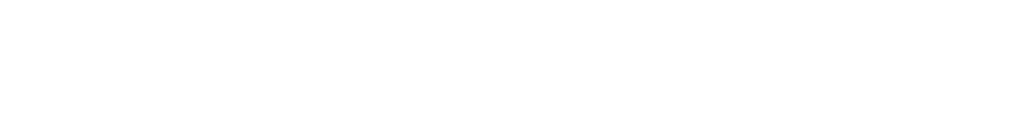

In [12]:
merged_df.dropna(inplace=True)
merged_df.shape

(752, 8)

### Create new Variables

In [13]:
merged_df.columns

Index(['participant_id', 'age', 'sex', 'weight', 'height', 'trt_grp',
       'RESPONSE', 'protein_concentration'],
      dtype='object')

In [14]:
merged_df['bmi'] = round(merged_df['weight']/merged_df['height']**2)
merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,0,148.0,33.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,1,85.0,26.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,0,183.0,23.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,1,89.0,28.0
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,0,137.0,43.0


## Analysis

To compare the mean age in the two treatment groups:

In [15]:
merged_df.groupby('trt_grp')['age'].mean()


trt_grp
CONTROL    61.809019
DRUG       61.672000
Name: age, dtype: float64

Compare mean age in responders vs non-responders

In [16]:
merged_df.groupby('RESPONSE')['age'].mean()


RESPONSE
0    61.656398
1    61.848485
Name: age, dtype: float64

compare responders and non-responders in the two treatment arms

In [17]:
merged_df.groupby(['trt_grp', 'RESPONSE'])['age'].count()


trt_grp  RESPONSE
CONTROL  0           254
         1           123
DRUG     0           168
         1           207
Name: age, dtype: int64

compare mean weight in responders/non-responders:

In [18]:
merged_df.groupby('RESPONSE')['weight'].mean()


RESPONSE
0    89.939573
1    93.188939
Name: weight, dtype: float64

compare protein concentration in responders vs non-responders

In [19]:
merged_df.groupby('RESPONSE')['protein_concentration'].mean()


RESPONSE
0    135.706161
1    104.339394
Name: protein_concentration, dtype: float64

***This suggests that, on average, patients who responded to the treatment had a lower protein concentration compared to those who did not respond.***

In [20]:
merged_df.groupby('trt_grp')['weight'].mean()

trt_grp
CONTROL    91.938382
DRUG       90.789547
Name: weight, dtype: float64

## Visualisation

Boxplot of age by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='age'>

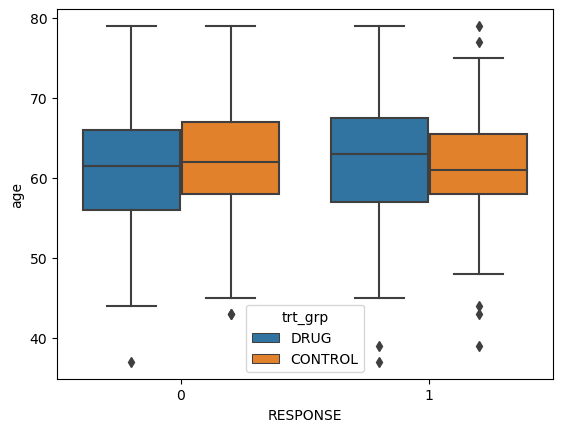

In [21]:
sns.boxplot(x='RESPONSE', y='age', hue='trt_grp', data=merged_df)

Boxplot of weight/BMI by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='weight'>

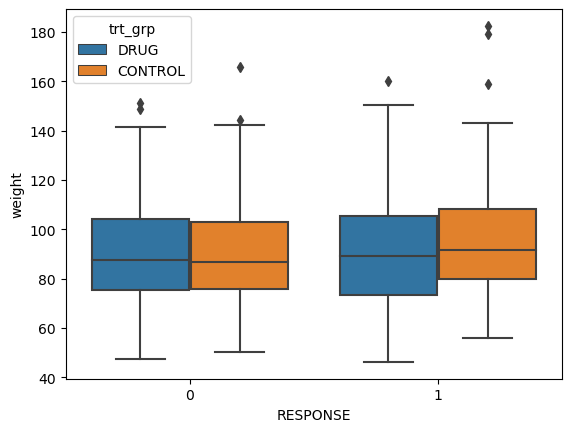

In [22]:
sns.boxplot(x='RESPONSE', y='weight', hue='trt_grp', data=merged_df)


Boxplot of protein_concentration by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='protein_concentration'>

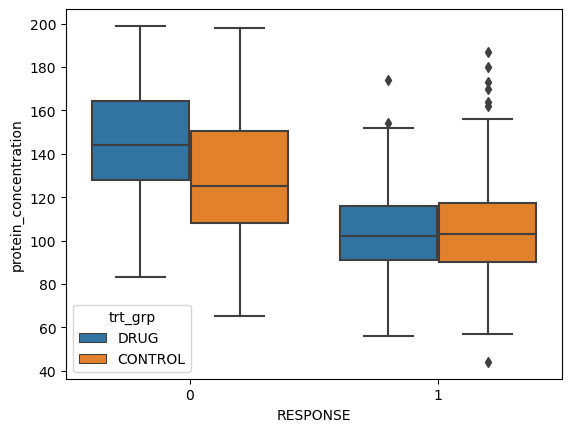

In [23]:
sns.boxplot(x='RESPONSE', y='protein_concentration', hue='trt_grp', data=merged_df)


Differences in protein concentration between responders and non-responders in each treatment group can be clearly observed

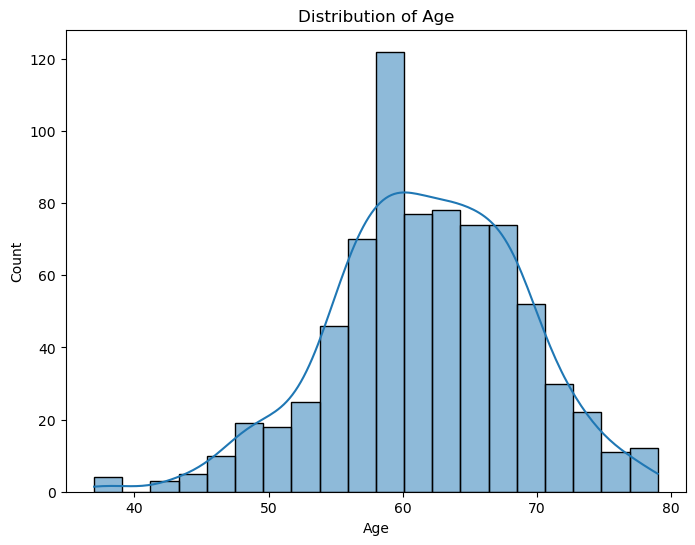

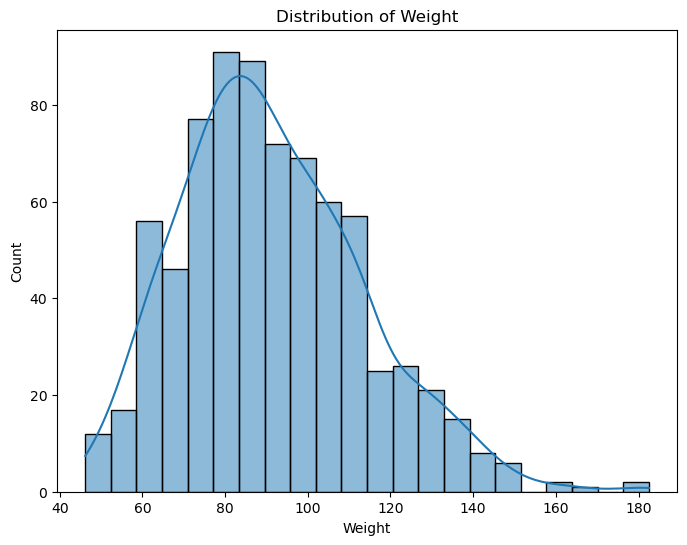

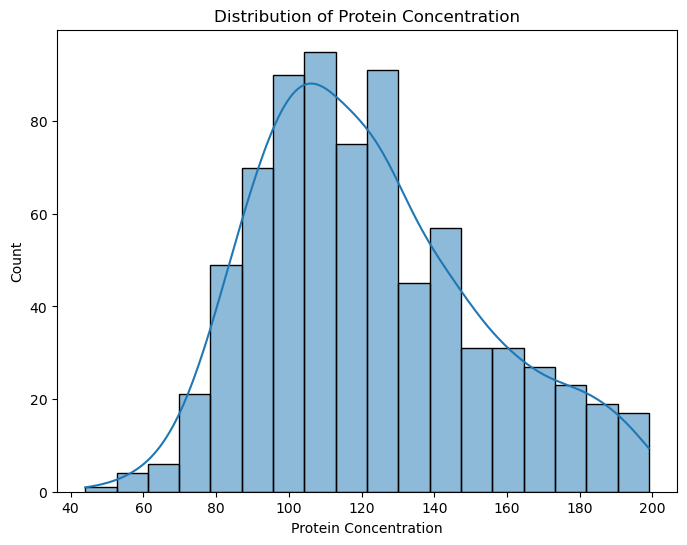

In [24]:
# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Histogram of weight
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['weight'], kde=True)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

# Histogram of protein concentration
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['protein_concentration'], kde=True)
plt.xlabel('Protein Concentration')
plt.ylabel('Count')
plt.title('Distribution of Protein Concentration')
plt.show()

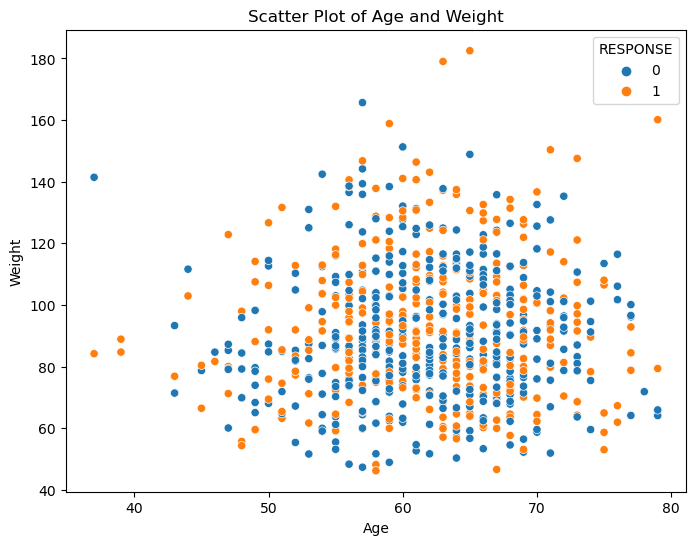

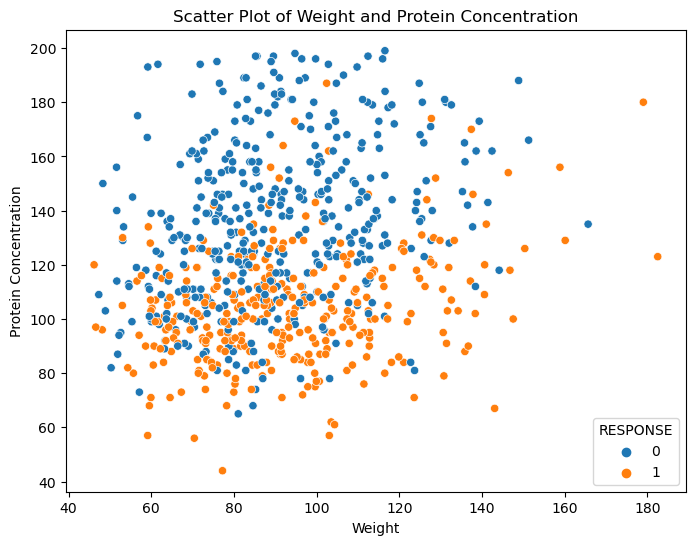

In [25]:
# Scatter plot of age and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='weight', data=merged_df, hue='RESPONSE')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Scatter Plot of Age and Weight')
plt.show()

# Scatter plot of weight and protein concentration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='protein_concentration', data=merged_df, hue='RESPONSE')
plt.xlabel('Weight')
plt.ylabel('Protein Concentration')
plt.title('Scatter Plot of Weight and Protein Concentration')
plt.show()


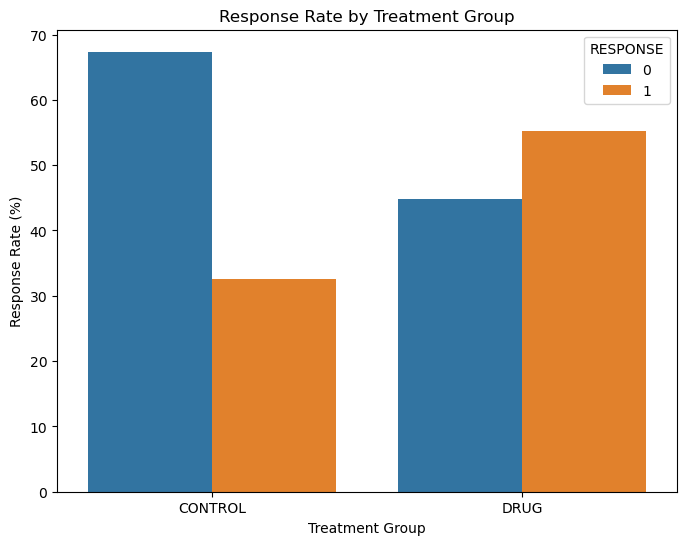

In [26]:
# Bar plot of response rate by treatment group
response_rate = merged_df.groupby('trt_grp')['RESPONSE'].value_counts(normalize=True).mul(100).rename('Response Rate').reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='trt_grp', y='Response Rate', hue='RESPONSE', data=response_rate)
plt.xlabel('Treatment Group')
plt.ylabel('Response Rate (%)')
plt.title('Response Rate by Treatment Group')
plt.show()


## Statistical Analysis

**Hypothesis Testing for Response Rates between Treatment Groups**

    To determine if there is a statistically significant difference in response rates between the treatment groups, 
    
    we can perform a chi-square test or Fisher's exact test if the sample sizes are small

In [27]:
import scipy.stats as stats

# Create a contingency table of treatment group and response
contingency_table = pd.crosstab(merged_df['trt_grp'], merged_df['RESPONSE'])
contingency_table

RESPONSE,0,1
trt_grp,,
CONTROL,254,123
DRUG,168,207


In [28]:
# Perform chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Check if the p-value is less than the significance level (e.g., 0.05) for statistical significance
if p_value < 0.05:
    print("There is a statistically significant difference in response rates between treatment groups.")
else:
    print("There is no statistically significant difference in response rates between treatment groups.")


There is a statistically significant difference in response rates between treatment groups.


**Regression Analysis to Predict Response to Treatment**

In [29]:
merged_df.dtypes

participant_id            object
age                      float64
sex                       object
weight                   float64
height                   float64
trt_grp                   object
RESPONSE                   int64
protein_concentration    float64
bmi                      float64
dtype: object

In [30]:
merged_df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [31]:
# Convert 'Yes' to 1 and 'No' to 0
merged_df['sex'] = merged_df['sex'].map({'Female': 1, 'Male': 0})
# Define the bin edges
bins = [0, 18, 30, 40, 50, 60, 70, 120]  # Modify the bin edges as desired


# Create a new column with age bins
merged_df['age_bin'] = pd.cut(merged_df['age'],
                            bins=bins)



# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column you want to label encode
merged_df['age_bin'] = label_encoder.fit_transform(merged_df['age_bin'])    




# # Create an instance of MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the column(s) you want to scale
# merged_df['protein_concentration_scaled'] = scaler.fit_transform(merged_df[['protein_concentration']])




merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,bmi,age_bin
0,SUBJ_001,46.0,1,84.66,1.59,DRUG,0,148.0,33.0,1
2,SUBJ_002,47.0,1,71.21,1.64,DRUG,1,85.0,26.0,1
3,SUBJ_003,48.0,1,69.85,1.73,CONTROL,0,183.0,23.0,1
4,SUBJ_004,59.0,1,62.94,1.50,DRUG,1,89.0,28.0,2
5,SUBJ_005,59.0,1,113.91,1.63,CONTROL,0,137.0,43.0,2


In [32]:
import statsmodels.api as sm


def logit_model(features):

    # Prepare the independent variables (age, weight, protein concentration) and the dependent variable (Response)
    X = merged_df[features]
    X = sm.add_constant(X)  # Add constant term for the intercept
    y = merged_df['RESPONSE']

    # Fit logistic regression model
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit()

    # Print the regression summary
    print(logit_result.summary())


In [33]:
logit_model(features=['age_bin', 'weight', 'protein_concentration'])

Optimization terminated successfully.
         Current function value: 0.507441
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  752
Model:                          Logit   Df Residuals:                      748
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.2599
Time:                        19:56:12   Log-Likelihood:                -381.60
converged:                       True   LL-Null:                       -515.60
Covariance Type:            nonrobust   LLR p-value:                 8.281e-58
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.8764      0.602      6.444      0.000       2.697       5.

The logistic regression model results indicate the following:

    The constant term (intercept) has a coefficient of 3.9895, and it is statistically significant with a p-value < 0.05. This indicates that there is a significant effect on the log-odds of the response variable.

The coefficient for the age variable is -0.0003, and it is not statistically significant (p-value = 0.983). This suggests that ***age does not have a significant impact*** on predicting the response to treatment.

    The coefficient for the weight variable is 0.0248, and it is statistically significant (p-value < 0.05). This suggests that weight has a significant impact on predicting the response to treatment, with a positive association.

    The coefficient for the protein_concentration variable is -0.0549, and it is statistically significant (p-value < 0.05). This suggests that protein concentration has a significant impact on predicting the response to treatment, with a negative association.

Overall, the logistic regression model suggests that weight and protein concentration are significant predictors of response to treatment, while age does not have a significant effect. However, it is important to note that the pseudo R-squared value indicates that the model explains about 25.98% of the variability in the response variable, suggesting that **other factors not included in the model may also contribute to the prediction of treatment response**.

In [34]:
logit_model(features=['bmi', 'protein_concentration'])

Optimization terminated successfully.
         Current function value: 0.503517
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  752
Model:                          Logit   Df Residuals:                      749
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.2656
Time:                        19:56:12   Log-Likelihood:                -378.64
converged:                       True   LL-Null:                       -515.60
Covariance Type:            nonrobust   LLR p-value:                 3.304e-60
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.5720      0.536      6.666      0.000       2.522       4.

pseudo R-squared value indicates that the model explains about 26.56% of the variability in the response variable